## IMPORTING REQUIRED LIBRARIES AND PREPARING DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Here we are reading the csv files of the training data set and the testing data set and storing the result inside the train_df , test_df variables respectively as pandas dataframe.

In [ ]:
train_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mini Project/fashion-mnist_train.csv" , sep = ",")
test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mini Project/fashion-mnist_test.csv", sep = ",")

## VISUALISING THE MODEL

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df.shape , test_df.shape

((60000, 785), (10000, 785))

CONVERTING THE PANDAS DATAFRAME ( BOTH TRAINING AND TESTING ) TO NUMPY ARRAYS.

In [ ]:
train = np.array(train_df , dtype="float32" )

In [ ]:
test = np.array(test_df , dtype="float32" )

An random image from the dataset is shown here with its label.

In [ ]:
import random

Label is :-->  9.0


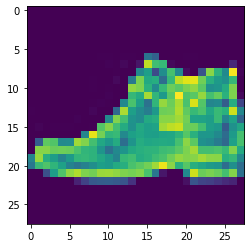

In [ ]:
i = random.randint(1, 60000)
plt.imshow( train[i , 1: ].reshape(28,28))
label = train[i,0]
print("Label is :--> ",label)

In [ ]:
#Labels of all the classes are given below -->
#1--> Trouser
#2--> Pullover
#3--> Dress
#4--> Coat
#5--> Sandal
#6--> Shirt
#7--> Sneaker
#8--> Bag
#9--> Ankle Boot

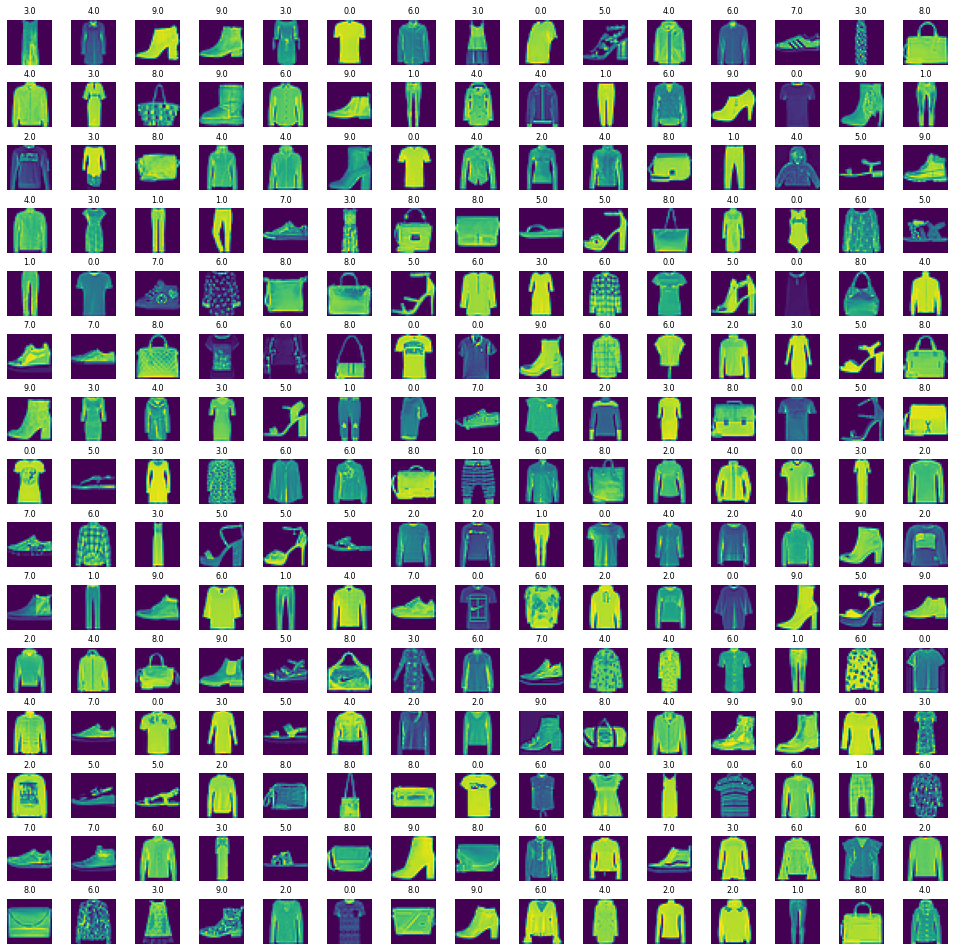

In [ ]:
# view all the images in grid format
# Define the dimension of the plot grid
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17) )

axes = axes.ravel() # Flatten the 15x15 matrix into 255 array.

n_train = len(train) # Get the length of training dataset.

for i in np.arange(0, (W_grid*L_grid) ):# Create evenly spaces variables
   
   # select a random number
   index = np.random.randint(0, n_train)
   # read and display the image with selected index
   axes[i].imshow( train[index, 1:].reshape((28,28)) )
   axes[i].set_title(train[index, 0], fontsize = 8)
   axes[i].axis("off")

plt.subplots_adjust(hspace = 0.4)   


##TRAINING THE MODEL

Here we are splitting out dataset into train, test sets.

In [ ]:
x_train = train[:, 1: ]/255
y_train = train[:, 0]

In [ ]:
x_test = test[:, 1:]/255
y_test = test[:, 0]

In [ ]:
from sklearn.model_selection import train_test_split

 Here we are splitting the training set into training and validation set at a ratio 8:2. 

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1234 )

 Here we are reshaping our image datasets from (784x1) to (28x28) so that we can feed this array to the Convolutional Neural Network.

In [ ]:
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28,28,1) )

In [ ]:
x_train.shape , x_test.shape , x_validate.shape

((48000, 28, 28, 1), (10000, 28, 28, 1), (12000, 28, 28, 1))

In [ ]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()

In [ ]:
# Input shape = 28x28
# Total no of features = 100
# feature_matrix(kernel) size = (3,3)
# Activation Function = RELU
cnn_model.add( Conv2D( 100, 3, 3, input_shape = (28,28,1), activation="relu" ))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """


In [ ]:
# MaxPooling
cnn_model.add(MaxPooling2D(pool_size=(2,2) ) )

In [ ]:
# Flattening
cnn_model.add(Flatten() )

In [ ]:
# Hidden layer
cnn_model.add(Dense(output_dim = 100, activation="relu"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100)`
  


In [ ]:
# Output layer
cnn_model.add(Dense(output_dim = 10, activation="sigmoid"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [ ]:
# Compile The Model
# Loss function is taken as "sparse_categorical_crossentropy" becoz output has values 0 to 9.
cnn_model.compile( loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"] )

In [ ]:
epochs = 50

In [ ]:
cnn_model.fit(
    x_train,
    y_train,
    batch_size = 100,
    nb_epoch = epochs,
    verbose = 1,
    validation_data = (x_validate, y_validate)
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 53s 1ms/step - loss: 0.4754 - accuracy: 0.8361 - val_loss: 0.3481 - val_accuracy: 0.8745
Epoch 2/50
48000/48000 [==============================] - 52s 1ms/step - loss: 0.3116 - accuracy: 0.8908 - val_loss: 0.3017 - val_accuracy: 0.8927
Epoch 3/50
48000/48000 [==============================] - 52s 1ms/step - loss: 0.2651 - accuracy: 0.9053 - val_loss: 0.2696 - val_accuracy: 0.9047
Epoch 4/50
48000/48000 [==============================] - 52s 1ms/step - loss: 0.2325 - accuracy: 0.9162 - val_loss: 0.2583 - val_accuracy: 0.9072
Epoch 5/50
48000/48000 [==============================] - 51s 1ms/step - loss: 0.2084 - accuracy: 0.9247 - val_loss: 0.2721 - val_accuracy: 0.9051
Epoch 6/50
48000/48000 [==============================] - 51s 1ms/step - loss: 0.1898 - accuracy: 0.9306 - val_loss: 0.2589 - val_accuracy: 0.9083
Epoch 7/50
48000/48000 [==============================] - 51s 1ms/st

## EVALUATIG THE MODEL

In [ ]:
evaluation = cnn_model.evaluate(x_test, y_test)
print("Test Accuracy : {: .3f}".format(evaluation[1]))

10000/10000 [==============================] - 4s 356us/step
Test Accuracy :  0.921


In [ ]:
evaluation

[0.4727724372280063, 0.9210000038146973]

In [ ]:
predicted_classes = cnn_model.predict_classes(x_test)

In [ ]:
predicted_classes 

array([0, 1, 2, ..., 8, 8, 1])

In [ ]:
predicted_classes.shape

(10000,)

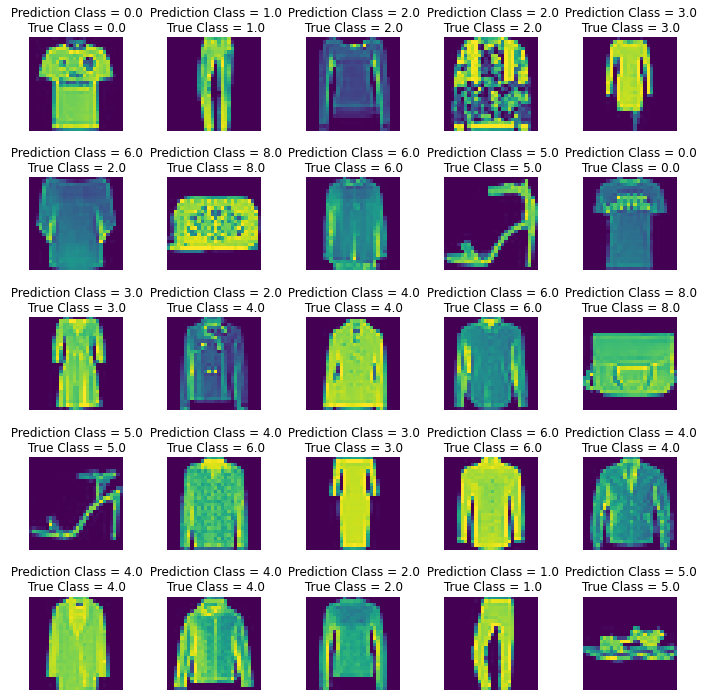

In [ ]:
# view all the images in grid format
# Define the dimension of the plot grid
W = 5
L = 5
fig, axes = plt.subplots(L, W, figsize = (12,12) )
axes = axes.ravel() # Flatten the 15x15 matrix into 255 array.

for i in np.arange(0, (L*W) ):# Create evenly spaces variables
   axes[i].imshow( x_test[i].reshape((28,28)) )
   axes[i].set_title(" Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
   axes[i].axis("off")

plt.subplots_adjust(hspace = 0.5)   


In [ ]:
predicted_classes = cnn_model.predict_classes(x_test)

In [ ]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

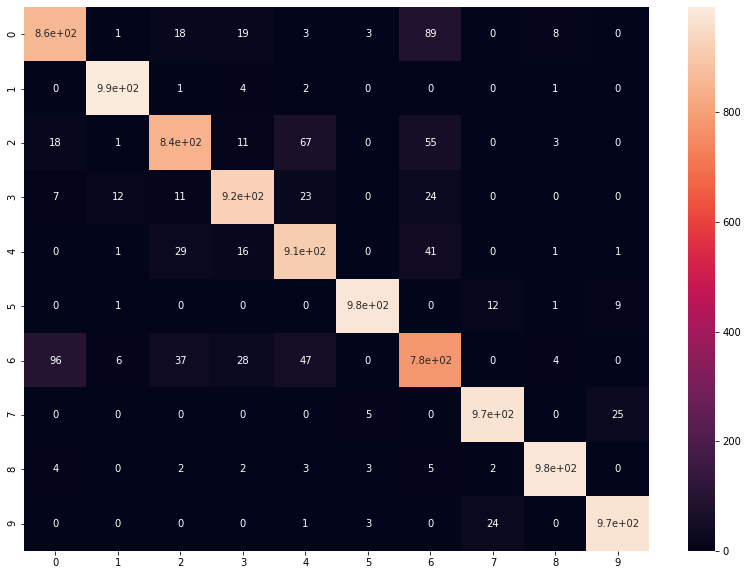

In [ ]:
# printing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)


In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.87      0.86      0.87      1000
     class 1       0.98      0.99      0.99      1000
     class 2       0.90      0.84      0.87      1000
     class 3       0.92      0.92      0.92      1000
     class 4       0.86      0.91      0.89      1000
     class 5       0.99      0.98      0.98      1000
     class 6       0.79      0.78      0.78      1000
     class 7       0.96      0.97      0.97      1000
     class 8       0.98      0.98      0.98      1000
     class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

